<h1> Quiescent SP </h1>

Quiescent Schrödinger–Poisson initial value problem 
\begin{equation} 
\left\{ \begin{array}{ll}
u_{xxxx} \approx \lambda u^3, & \mbox{$a\leq x\leq b$},\\
u(x_0) = \alpha, \, u_x(x_0) = \beta, \, u_{xx}(x_0) = \gamma, \, u_{xxx}(x_0) = \delta, & \mbox{$a \leq x_0 \leq b$},
\end{array} \right. 
\end{equation}
with $\alpha,\beta,\gamma,\delta,\lambda\in\mathbb{R}$,  is  solved  using  Runge–Kutta IV method.

<h4> Essential Libraries </h4>

In [1]:
# --------------------/
%matplotlib inline
# --------------------/
import math
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
from scipy import *
from ipywidgets import *

<h4> Initial Value Problem </h4>

In [641]:
def F(x):
    """
    Bour breather
    """
    a, b = 0.8, -7.3
    A, B = 0.6, 0.7 
    return np.arctan((A*np.cos(b*x)) / (B*np.cosh(a*x)))
# ------------------------------------------------------------/
def f(x, a, b, c, u):
    """
    du/dx = p
    """
    return a
# ------------------------------------------------------------/
def g(x, a, b, c, u):
    """
    dp/dx = q
    """
    return b
# ------------------------------------------------------------/
def h(x, a, b, c, u):
    """
    dq/dx = r
    """
    return c
# ------------------------------------------------------------/
def j(x, a, b, c, u):
    """
    dr/dx = l*u**3
    """
    T0 = u**3
    T1 = 3*u**2*a*x
    T2 = 3*(u*a**2 + 1.5*u**2*b)*x**2
    T3 = (a**3 + 3*u*a*b + 0.5*u**2*c)*x**3
    return 1.0*(T0 + T1 + T2 + T3) - 0.5*np.exp(-0.01*x**2)
# ------------------------------------------------------------/

<h4> Runge-Kutta IV </h4>

In [642]:
def rk(x, a, b, c, d):
    """
    Runge-Kutta IV Order
    """
    
    # first stage
    A1 = k*f(x, a, b, c, d)
    B1 = k*g(x, a, b, c, d)
    C1 = k*h(x, a, b, c, d)
    D1 = k*j(x, a, b, c, d)
    
    # second stage
    A2 = k*f(x + 0.5*k, a + 0.5*A1, b + 0.5*B1, c + 0.5*C1, d + 0.5*D1)
    B2 = k*g(x + 0.5*k, a + 0.5*A1, b + 0.5*B1, c + 0.5*C1, d + 0.5*D1)
    C2 = k*h(x + 0.5*k, a + 0.5*A1, b + 0.5*B1, c + 0.5*C1, d + 0.5*D1)
    D2 = k*j(x + 0.5*k, a + 0.5*A1, b + 0.5*B1, c + 0.5*C1, d + 0.5*D1)
    
    # third stage
    A3 = k*f(x + 0.5*k, a + 0.5*A2, b + 0.5*B2, c + 0.5*C2, d + 0.5*D2)
    B3 = k*g(x + 0.5*k, a + 0.5*A2, b + 0.5*B2, c + 0.5*C2, d + 0.5*D2)
    C3 = k*h(x + 0.5*k, a + 0.5*A2, b + 0.5*B2, c + 0.5*C2, d + 0.5*D2)
    D3 = k*j(x + 0.5*k, a + 0.5*A2, b + 0.5*B2, c + 0.5*C2, d + 0.5*D2)
    
    # fourth stage
    A4 = k*f(x + k, a + A3, b + B3, c + C3, d + D3)
    B4 = k*g(x + k, a + A3, b + B3, c + C3, d + D3)
    C4 = k*h(x + k, a + A3, b + B3, c + C3, d + D3)
    D4 = k*j(x + k, a + A3, b + B3, c + C3, d + D3)
    
    # update
    a += (A1 + 2.0*(A2 + A3) + A4)/6.0
    b += (B1 + 2.0*(B2 + B3) + B4)/6.0
    c += (C1 + 2.0*(C2 + C3) + C4)/6.0
    d += (D1 + 2.0*(D2 + D3) + D4)/6.0
    x += k
    
    return a, b, c, d

<h4> Iteration </h4>

(-2.5360178914586644, 0.34999999999999998)

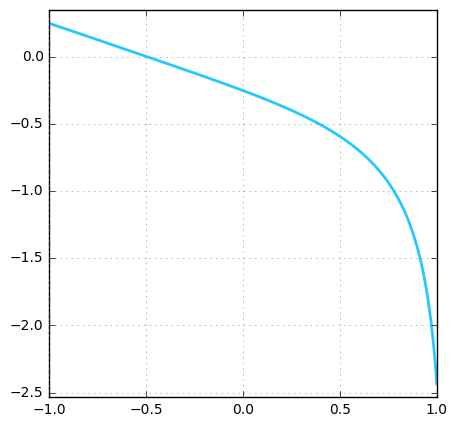

In [644]:
# domain
a, b, n = -1, 1, 800

# x-vector
x = np.linspace(a, b, n)

# step size
k = (b - a)/float(n)

# matrix solution
U = np.zeros((4, n))
# ------------------------------------------------------------/
"""
NUMERICAL TESTS
---------------------------------------------------------
p      q      r      s      l     force
---------------------------------------------------------
-0.05  -1.0   0.05   0.01   1      4.5*cosh(pi*x)**(-2)
 0.05  -1.0   0.05   0.01  -1      4.5*cosh(pi*x)**(-2)
 0.05   1.8   0.05   0.0   -1      4.5*cos(pi*x)**(-2)
 0.05   0.01  0.01   0.25   1      0.0
 0.05   0.01  0.01   0.25   1      0.25*cos(1.13*x)
-0.12   0.2   0.05   0.1    2     -2*cos(1.13*x)
-0.05  -0.5   0.15   0.5    0.001  0.005*exp(-0.05*x**2)
-0.05  -0.5   0.15   0.5    0.001  0.05*exp(-0.05*x**2)
-0.05  -0.5   0.15   0.5    0.001  0.5*exp(-0.05*x**2)
-0.05  -0.5   0.15   0.5    0.001  1.5*exp(-0.05*x**2)
-0.01  -0.5   0.05   0.5    0.001  1.5*exp(-0.05*x**2)
 0.01  -0.5  -0.5    0.5    0.01   2*exp(-0.05*x**2)
 0.01  -0.7  -0.5    0.5    0.01  -2*exp(-5*x**2)
---------------------------------------------------------
"""
r, s = 0.01, 0.25
p, q = 0.05, 0.01
# ------------------------------------------------------------/
for i in range(n):
    U[:,i] = p, q, r, s
    p, q, r, s = rk(a, p, q, r, s)
# ------------------------------------------------------------/    
plt.figure(figsize=(5,5))
plt.plot(x, U[3,:], lw = 2, alpha = 0.85, color = 'deepskyblue')
plt.grid(color='lightslategray', alpha=0.90)
plt.ylim(U[3,:].min() - .1, U[3,:].max() + .1)

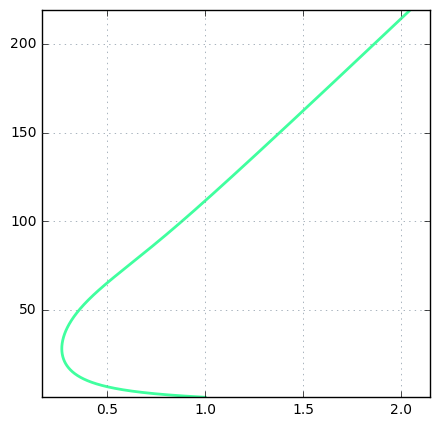

In [585]:
# ------------------------------------------------------------/
def evolution(step):
    plt.figure(figsize=(5,5))
    plt.plot(U[3,:step], U[2,:step], lw = 2, alpha = 0.75, color = 'springgreen')
    plt.grid(color='lightslategray', alpha=0.90)
    plt.xlim(U[3,:].min() - .1, U[3,:].max() + .1)
    plt.ylim(U[2,:].min() - .1, U[2,:].max() + .1)
# --------------------------------------------------/
# interactive plot
step = widgets.IntSlider(min=0, max=n, description='step')
interact(evolution, step=step)

> NB property of [FVNTS](http://www.fvnts.ch)